# <center>Traffic Sign Detection through Image Classification</center>

## Group Member's Name:

- Aniketh Vaglapuram C0903304
- Aishlee C0913045 
- Dev Parmar C0908036
- Guruprasad Tandlekar C0902813
- Siddharth Yadav C0907985
- Yogita Sharma C0913011

## Project Overview
In this project, we aim to develop a robust image classification system for detecting traffic signs. Leveraging machine learning techniques, particularly deep learning algorithms, we seek to accurately classify various types of traffic signs commonly found on roads. The ultimate goal is to enhance road safety by enabling automated detection and recognition of traffic signs in real-time.

## Dataset Overview
- **Total number of classes:** 43
- **Total number of images in the dataset:** 34,799

In [1]:
#importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import  cv2
import pickle
import os
import pandas as pd
import random
import warnings

In [2]:
warnings.filterwarnings('ignore')

- **path**: Stores the directory path where the dataset is located.
  
- **labelFile**: Holds the filename of the CSV file containing labels for the dataset.
  
- **batch_size_val**: Determines the number of samples in each batch during training. A batch size of 32 means each iteration during training will process 32 samples.
  
- **epochs_val**: Represents the number of times the entire dataset will be passed forward and backward through the neural network during training.
  
- **imageDimesions**: Defines the dimensions of the input images, specifying width, height, and the number of color channels (in this case, 3 for RGB images).
  
- **testRatio**: Determines the ratio of the dataset to be allocated for testing. Here, 30% of the dataset will be used for testing.
  
- **validationRatio**: This variable seems to have been intended to represent the ratio for splitting the training set into training and validation sets, but it's marked with a comment indicating it's not valid. If you intended to specify the validation split, you may want to adjust this line accordingly or remove the comment.

In [3]:
# defining the path for dataset
path = "data" 
labelFile = 'labels.csv' 
batch_size_val=32 
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.30    
validationRatio = 0.30

## Preprocessing

This section of code is responsible for importing and preprocessing the dataset.

- **Initialize variables**: Variables like `count`, `images`, and `classNo` are initialized to keep track of the number of classes and their respective images.

- **Get list of directories**: The code retrieves a list of directories within the specified path, each directory representing a class of images.

- **Loop through each class directory**: It iterates over each class directory, reading each image within the directory using OpenCV (`cv2.imread()`).

- **Append image and class label**: For each image, it appends the image itself and its corresponding class label to the `images` and `classNo` lists, respectively.

- **Print progress**: During the loop, it prints the current class count to track progress.

- **Completion message**: Finally, it prints a message indicating that the process of importing classes is complete.


In [4]:
# preprocessing
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")

for x in range (0,len(myList)):
    
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    if count==noOfClasses-1:
        print(count)
        break
    print(count, end ="->")
    count +=1

print("Done Importing classes")

Total Classes Detected: 43
Importing Classes.....
0->1->2->3->4->5->6->7->8->9->10->11->12->13->14->15->16->17->18->19->20->21->22->23->24->25->26->27->28->29->30->31->32->33->34->35->36->37->38->39->40->41->42
Done Importing classes


# Converting Images and ClassNo to Numpy Arrays

In [5]:
images = np.array(images)
classNo = np.array(classNo)

# Exploratory Data Analysis

In [6]:
# summary of the Dataset
num_classes = len(np.unique(classNo))
print("Total number of classes:", num_classes)

dataset_size = len(images)
print("Total number of images in the dataset:", dataset_size)

Total number of classes: 43
Total number of images in the dataset: 34799


In [7]:
# shuffle the Images 
shuffle_indices = np.random.permutation(dataset_size)
shuffled_images = images[shuffle_indices]
shuffled_labels = classNo[shuffle_indices]

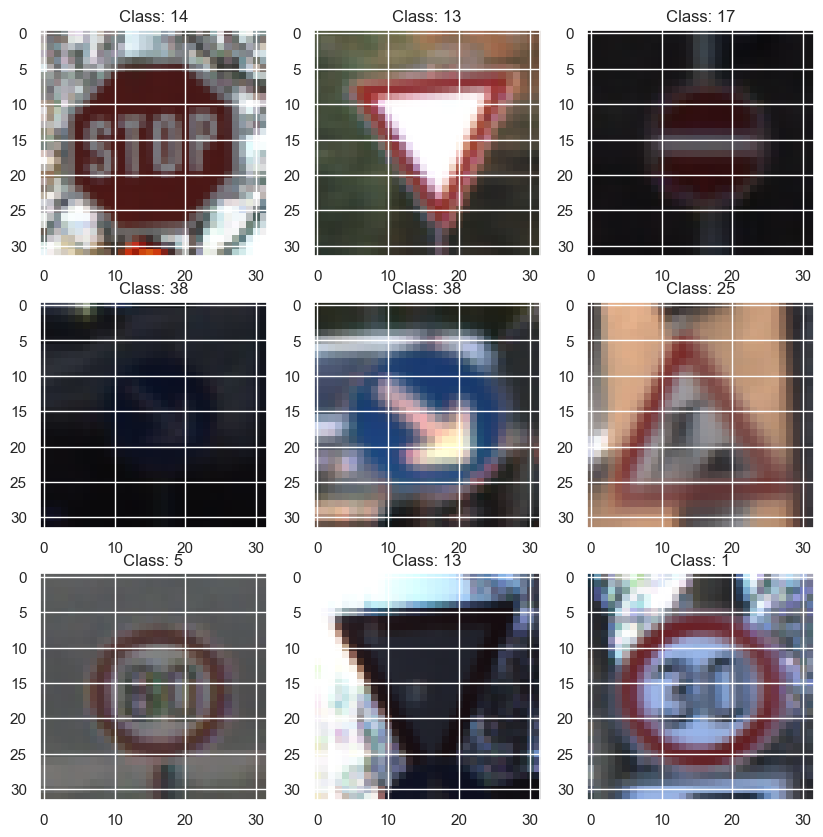

In [40]:
# Visualizing the Images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(shuffled_images[i])
    ax.set_title("Class: " + str(shuffled_labels[i]))
plt.show()

- The grid displays a collection of images, each labeled with its corresponding class.
- Each image represents a specific traffic sign, categorized into different classes.

# Class Distribution

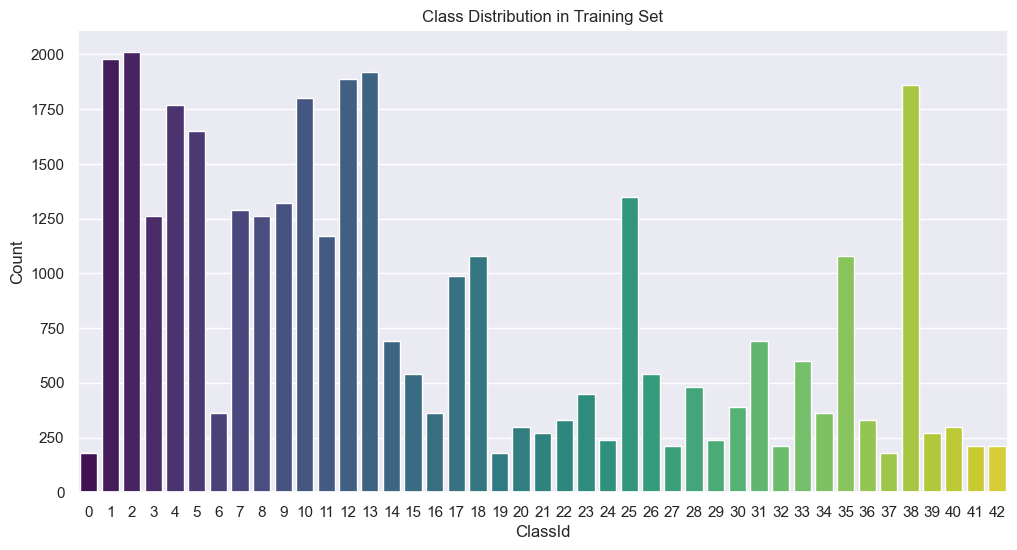

In [39]:
class_counts = np.bincount(classNo)
plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(len(class_counts)), y=class_counts, palette="viridis")
plt.xlabel('ClassId')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')
plt.show()

- **Class Distribution in Training Set**:
  - The graph displays the distribution of classes within the training dataset.
  - Each bar represents a class, labeled accordingly on the x-axis.
  - The height of each bar indicates the count of instances belonging to that class in the training set.
  - The colors may represent different classes for better visualization.
  - The graph provides insights into the distribution of instances across different classes, highlighting potential class imbalances or biases in the dataset.
- **Insight**:
  - The provided graph illustrates the class distribution within the training dataset.
  - It's evident that there is significant variation in the number of instances across different classes.
  - Some classes have a notably higher count of instances, while others have relatively fewer instances.
  - Class imbalances or biases in the dataset can impact the model's performance and may require special attention during model training and evaluation.
  - Addressing class imbalances, such as through data augmentation or sampling techniques, could help mitigate potential biases and improve the model's ability to generalize across all classes.


In [10]:
# Getting Pixel instensity of the Images
mean_pixel_intensity = np.mean(images)
std_pixel_intensity = np.std(images)
print("Mean pixel intensity:", mean_pixel_intensity)
print("Standard deviation of pixel intensity:", std_pixel_intensity)

Mean pixel intensity: 82.6775890369964
Standard deviation of pixel intensity: 67.85088842633249


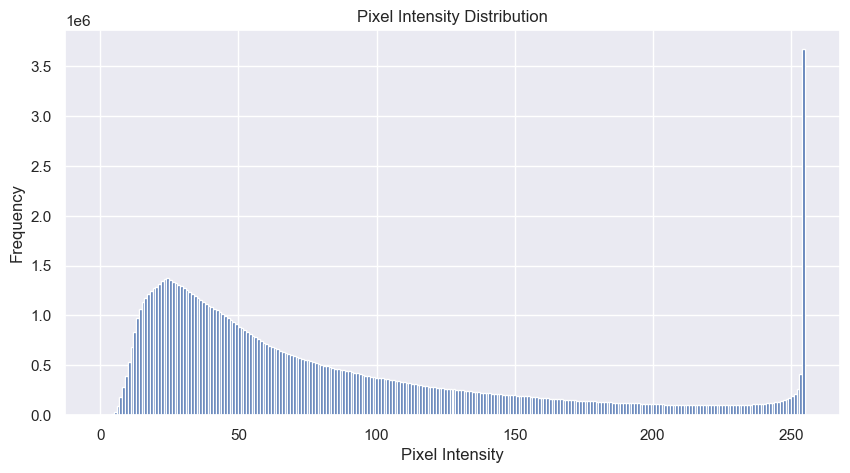

In [41]:
#pixel Intensity Distribution Plot
plt.figure(figsize=(10, 5))
plt.hist(images.ravel(), bins=256, range=(0, 255))
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

- **Explanation**:
  - The graph displays the distribution of pixel intensities within the image dataset.
  - Pixel intensity refers to the brightness of each pixel in an image, typically ranging from 0 (black) to 255 (white) in grayscale images.
  - The x-axis represents the pixel intensity values ranging from 0 to 255.
  - The y-axis represents the frequency of occurrence of each pixel intensity value.
  - The distribution appears heavily skewed towards lower pixel intensities, with a sharp decline in frequency as intensity values increase.

# Train Test Validation Split
- We are spliting the Data into Train test and Validation Split here.
- we took 70/30 split.
- 70% percent of the Data was for Training the model.
- 30% of unseen data was used for Testing purpose.
- Out of 30% percent of Testing Data 30% of Data was taken for  Validation purpose. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [13]:
# Printing the Shapes of Training , Testing and Validation Sets.
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(17051, 32, 32, 3) (17051,)
Validation(7308, 32, 32, 3) (7308,)
Test(10440, 32, 32, 3) (10440,)


# Loading the labels of the Data

In [14]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))
 
num_of_samples = []
cols = 5
num_classes = noOfClasses

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


# preprosseing the Image 
- Greyscaling the Image
- Equalize the hist of the pixels
- normalize the imagle

In [15]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)      
    img = img/255            
    return img

# calling the preprosseing 

In [16]:
X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [17]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

# Image Augmentation

In [18]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  

In [19]:
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)

In [20]:
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)


# Defining the model

In [21]:
def Model():
    model= Sequential()
    model.add((Conv2D(30,(5,5),input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add((Conv2D(15, (3,3),activation='relu')))
    model.add((Conv2D(15, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax')) 
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

- **Input Layer**: Accepts grayscale images of specified dimensions.
- **Convolutional Layers**:
  - First layer: 30 filters, 5x5 size, ReLU activation.
  - Second and third layers: 15 filters each, 3x3 size, ReLU activation.
- **Pooling Layers**:
  - Applied after the first and third convolutional layers.
  - Max pooling with a 2x2 pool size.
- **Dropout Layers**:
  - Rate of 0.5 applied after the first max pooling layer and after the fully connected layer.
- **Flatten Layer**: Flattens the output from the last convolutional layer.
- **Fully Connected Layers**:
  - First dense layer: 500 neurons, ReLU activation.
  - Second dense layer: `noOfClasses` neurons, softmax activation for multi-class classification.
- **Compilation**:
  - Adam optimizer with a learning rate of 0.001.
  - Categorical crossentropy loss function.
  - Accuracy metric for evaluation.

In [22]:
model = Model()
print(model.summary())
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=len(X_train)//32,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4065      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 15)        2040      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 15)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 15)         

## Evaluations
 - for performance evaluations we used are AUC and ROC

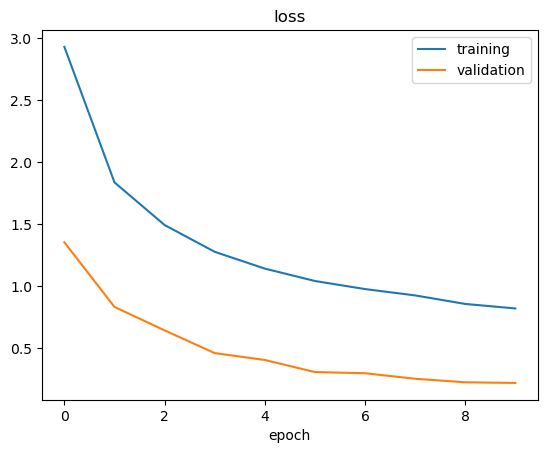

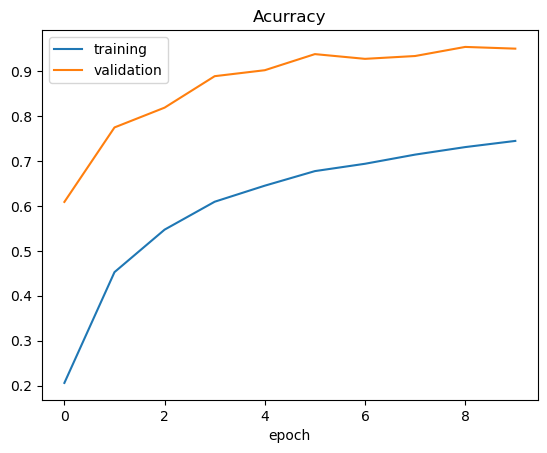

In [23]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

- **Loss Graph**:
  - The blue line represents the training loss, while the orange line represents the validation loss.
  - As the number of epochs increases, both the training and validation loss decrease.
  - The gap between the training and validation loss decreases over epochs, indicating that the model generalizes well to unseen data.

- **Accuracy Graph**:
  - The blue line represents the training accuracy, while the orange line represents the validation accuracy.
  - As the number of epochs increases, both the training and validation accuracy increase.
  - The gap between the training and validation accuracy decreases over epochs, indicating that the model generalizes well to unseen data.


In [29]:
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0]*100)
print('Test Accuracy:',score[1]*100)

Test Score: 23.277735710144043
Test Accuracy: 94.57854628562927


In [30]:
score =model.evaluate(X_validation,y_validation,verbose=0)
print('Validation Score:',score[0]*100)
print('Validation Accuracy:',score[1]*100)

Validation Score: 22.10843414068222
Validation Accuracy: 95.01915574073792


In [31]:
score = model.evaluate(X_train,y_train,verbose=0)
print('Train Score:',score[0]*100)
print('Train Accuracy:',score[1]*100)

Train Score: 21.863451600074768
Train Accuracy: 95.31405568122864


In [ ]:
model.save("trafficsignrecognition.h5")

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_pred = model.predict(X_test)
y_test_binarized = label_binarize(y_test.argmax(axis=1), classes=np.arange(num_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

327/327 [==============================] - 3s 9ms/step


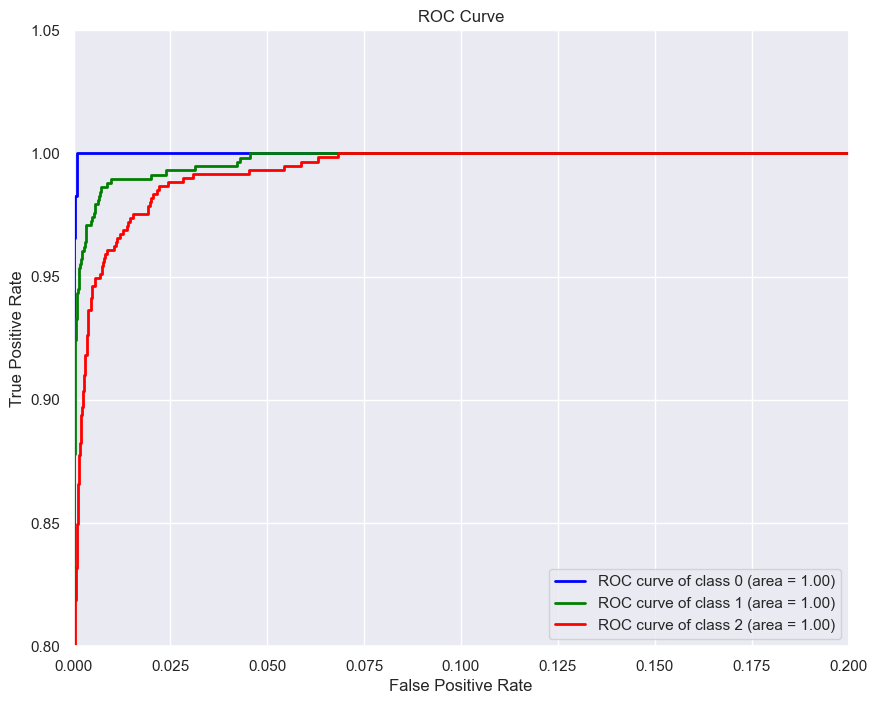

In [37]:
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 0.2])
plt.ylim([0.8, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

- **ROC Curve**:
  - The graph displays Receiver Operating Characteristic (ROC) curves for multiple classes.
  - Each colored line represents the ROC curve of a specific class, labeled accordingly.
  - The x-axis represents the False Positive Rate (FPR), and the y-axis represents the True Positive Rate (TPR).
  - A perfect classifier would have an ROC curve that reaches the top left corner of the plot, resulting in an area under the curve (AUC) equal to 1.00.
  - In this plot, all ROC curves reach near the top left corner, indicating excellent performance for each class with an AUC of 1.00.

In [34]:
y_pred = np.argmax(model.predict(X_test), axis=1)

327/327 [==============================] - 3s 8ms/step


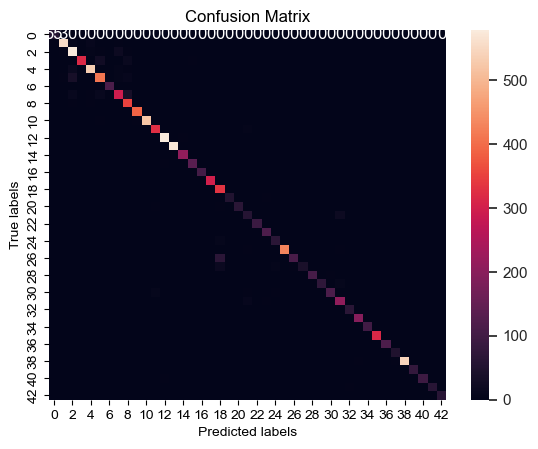

In [36]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
ax = plt.subplot()
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(cm, annot=True, ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

- **Confusion Matrix**:
  - The graph represents a confusion matrix, where the rows correspond to the true labels and the columns correspond to the predicted labels.
  - Each cell in the matrix contains the count or frequency of instances where the true label (row) was predicted as the predicted label (column).
  - The diagonal elements of the matrix (top-left to bottom-right) represent correct predictions, where the true label matches the predicted label.
  - Off-diagonal elements represent incorrect predictions, indicating the misclassification of instances.
  - The color intensity or heatmap represents the count or frequency of instances in each cell, with darker colors indicating higher counts.
  - In an ideal scenario, the confusion matrix would be diagonal, with high counts along the diagonal and low counts elsewhere, indicating accurate predictions across all classes.